All the countries across the globe have adapted to means of digital payments. And with the increased volume of digital payments, hacking has become a pretty common event wherein the hacker can try to hack your details just with your phone number linked to your bank account. However, there is data with some anonymized variables based on which one can predict that the hack is going to happen.



Right now I am facing an issue of converting date time to feature vector. I have used Label encoder for one of the columns and basically want to know

# Server Attack Prediction EDA

## Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
import pandas.util.testing as tm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


Upload the Train csv file in the Uploads section of colab

In [27]:
dataset = pd.read_csv('Train.csv')
dataset_eda = dataset.drop(['INCIDENT_ID', 'MULTIPLE_OFFENSE'], axis = 1)
print(dataset.describe())
print("Number of Offenses in Train data, 1: Attack happened 0: No attack")
print(dataset['MULTIPLE_OFFENSE'].value_counts())
dataset.info()

                X_1           X_2  ...          X_15  MULTIPLE_OFFENSE
count  23856.000000  23856.000000  ...  23856.000000      23856.000000
mean       0.483778     24.791206  ...     33.464747          0.955231
std        1.439738     15.240231  ...      8.386834          0.206800
min        0.000000      0.000000  ...      0.000000          0.000000
25%        0.000000      7.000000  ...     34.000000          1.000000
50%        0.000000     24.000000  ...     34.000000          1.000000
75%        0.000000     36.000000  ...     34.000000          1.000000
max        7.000000     52.000000  ...     50.000000          1.000000

[8 rows x 16 columns]
Number of Offenses in Train data, 1: Attack happened 0: No attack
1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCID

We see X_12  has some null value. Rest are non-null.

###Insights: For e.g. Finding the Correlation among the variables to avoid redundancy of parameters later in our model.  

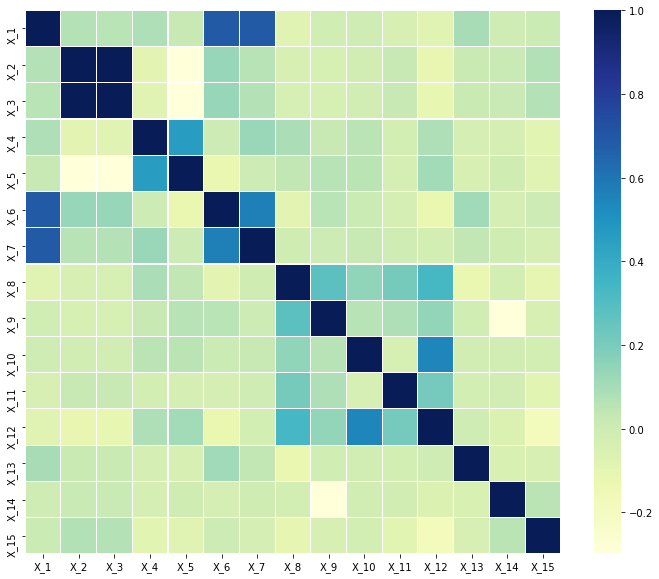

In [16]:
corrmat = dataset_eda.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

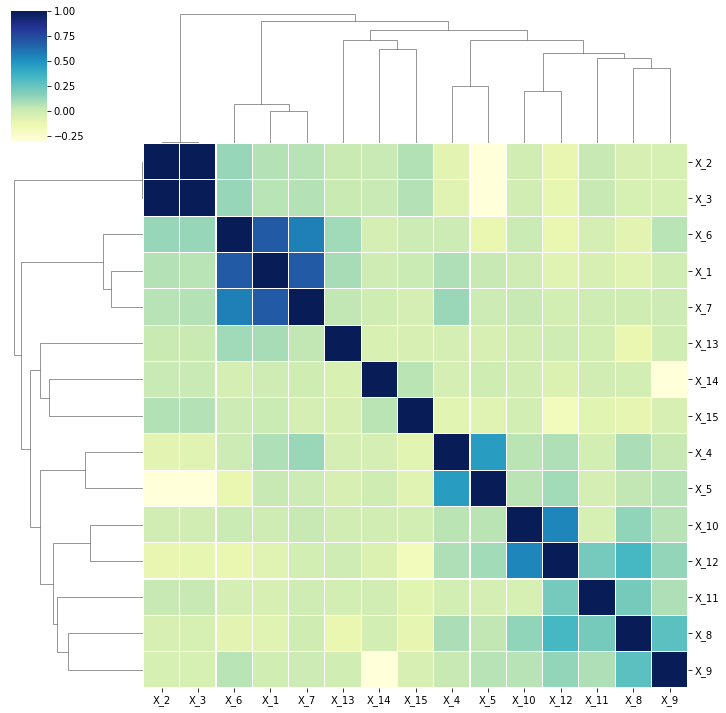

In [17]:
corrmat = dataset_eda.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

X2 , X3 **Very** highly Correlated

X1 , X6 Correlated ~0.8 

X1 , X7 Correlated ~0.8

## Decision Tree

Importing the Dataset , Missing values fill with mean. 

In [35]:
dataset = pd.read_csv('Train.csv')
dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%d-%b-%y')
#Extracting month out of date which is assumed to be significant. 
dataset['DATE'] = dataset['DATE'].dt.month
dataset.rename(columns={'DATE': 'MONTH'})
dataset = dataset.drop(['INCIDENT_ID', 'X_2'], axis =1)


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
totalcol = len(dataset.columns)
print(dataset.loc[0])


DATE                  7.0
X_1                   0.0
X_3                  34.0
X_4                   2.0
X_5                   1.0
X_6                   5.0
X_7                   6.0
X_8                   1.0
X_9                   6.0
X_10                  1.0
X_11                174.0
X_12                  1.0
X_13                 92.0
X_14                 29.0
X_15                 36.0
MULTIPLE_OFFENSE      0.0
Name: 0, dtype: float64


In [36]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:, 1:totalcol])
X[:, 1:totalcol]=imputer.transform(X[:, 1:totalcol])
print(X[0])

#print(dataset['INCIDENT_ID'].value_counts())

[  7.   0.  34.   2.   1.   5.   6.   1.   6.   1. 174.   1.  92.  29.
  36.]


### Encoding independent variable: Incident_Name


In [37]:
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[: , 0])
print (X[0])

[  6.   0.  34.   2.   1.   5.   6.   1.   6.   1. 174.   1.  92.  29.
  36.]


## Splitting the dataset into the Training set and Test set

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [39]:
print(X_train)

[[  6.   0.  15. ... 103.  62.  34.]
 [  2.   0.  23. ... 103.  29.  34.]
 [  4.   0.  23. ... 103.  29.  34.]
 ...
 [  5.   0.  49. ...  98.  80.  34.]
 [  5.   0.  32. ...  48.  87.  34.]
 [  3.   0.   6. ...  72. 130.  34.]]


In [ ]:
print(y_train)

[1 1 1 ... 1 1 1]


In [ ]:
print(X_test)

[[  4.   0.  40. ...  72.  29.  34.]
 [  0.   0.  16. ... 103.  93.  34.]
 [  3.   0.  45. ... 112. 142.  34.]
 ...
 [  5.   0.   4. ...  72.  29.  34.]
 [  6.   0.  49. ... 103.  62.  34.]
 [  8.   1.  39. ... 103. 124.  34.]]


In [ ]:
print(y_test)

[1 1 1 ... 0 1 1]


## Feature Scaling

How to not apply standard scalar to Company code and month. I.e first and second column. 

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
print(X_train)

[[ 0.15222033 -0.33471892 -0.58044076 ...  0.64316748 -0.25172888
   0.0614792 ]
 [-1.06459022 -0.33471892 -0.25328457 ...  0.64316748 -1.0137532
   0.0614792 ]
 [-0.45618494 -0.33471892 -0.25328457 ...  0.64316748 -1.0137532
   0.0614792 ]
 ...
 [-0.1519823  -0.33471892  1.5787901  ...  0.46156753  0.16392074
   0.0614792 ]
 [-0.1519823  -0.33471892  0.53189029 ... -1.35443188  0.32556227
   0.0614792 ]
 [-0.76038758 -0.33471892 -1.23475315 ... -0.48275216  1.31850304
   0.0614792 ]]


In [ ]:
print(X_test)

[[-0.45618494 -0.33471892  0.98990895 ... -0.48275216 -1.0137532
   0.0614792 ]
 [-1.67299549 -0.33471892 -0.58044076 ...  0.64316748  0.46411214
   0.0614792 ]
 [-0.76038758 -0.33471892  1.31706515 ...  0.97004737  1.59560279
   0.0614792 ]
 ...
 [-0.1519823  -0.33471892 -1.36561562 ... -0.48275216 -1.0137532
   0.0614792 ]
 [ 0.15222033 -0.33471892  1.5787901  ...  0.64316748 -0.25172888
   0.0614792 ]
 [ 0.76062561  0.35955315  0.92447772 ...  0.64316748  1.17995316
   0.0614792 ]]


## Training the Decision Tree model on the Training set

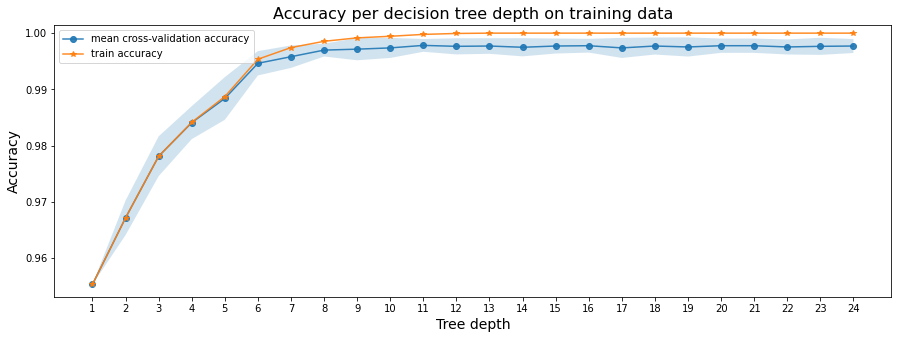

In [47]:

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import cross_val_score
#import numpy as np
#import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [48]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-11 tree achieves the best mean cross-validation accuracy 99.78202 +/- 0.05701% on training dataset


In [51]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    y_pred = model.predict(X_test)
    comparision = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
    print('Comparision of Predicted and Actual test values')
    print(comparision)
    return accuracy_train, accuracy_test, comparision

  

# train and evaluate a best-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test, comparision = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  11
Accuracy, Training Set:  99.97764 %
Accuracy, Test Set:  99.74849 %
Comparision of Predicted and Actual test values
[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [63]:
model = DecisionTreeClassifier(max_depth=13).fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 260    8]
 [   7 5689]]


0.9974849094567404

In [64]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.9844601605735368

Our Recall Score is 98.45% based on Decision Tree Classifier Model. 

Other Model in the same manner were performing poor as compared to Decision Tree, therefore for this project we will stick to decision tree to predict the values for data in test file. 

## Making Prediction on Test CSV 

In [66]:
testset = pd.read_csv('Test.csv')
mergeondataset = pd.read_csv('Test.csv')
testset['DATE'] = pd.to_datetime(testset['DATE'], format='%d-%b-%y')
testset['DATE'] = testset['DATE'].dt.month
testset.rename(columns={'DATE': 'MONTH'})
testset = testset.drop(['INCIDENT_ID', 'X_2'], axis =1)
X_testfile = testset.iloc[:, :].values
print(testset.loc[0])
print("Below is our Numpy array carrying first row carrying nan values")
print(X_testfile[0])

## Filling missing values and applying feature Scaling

imputer.fit(X_test[:, 1:totalcol -1 ])
X_testfile[:, 1:totalcol -1 ]=imputer.transform(X_testfile[:, 1:totalcol -1 ])
print("Below is our Numpy array carrying first row. Nan values removed")
print(X_testfile[0])

#Standard Scalar
X_testfile = sc.fit_transform(X_testfile)


DATE      2.0
X_1       0.0
X_3      35.0
X_4       7.0
X_5       3.0
X_6       6.0
X_7       4.0
X_8       0.0
X_9       5.0
X_10      1.0
X_11    174.0
X_12      NaN
X_13     72.0
X_14    119.0
X_15     23.0
Name: 0, dtype: float64
Below is our Numpy array carrying first row carrying nan values
[  2.   0.  35.   7.   3.   6.   4.   0.   5.   1. 174.  nan  72. 119.
  23.]
Below is our Numpy array carrying first row. Nan values removed
[2.00000000e+00 0.00000000e+00 3.50000000e+01 7.00000000e+00
 3.00000000e+00 6.00000000e+00 4.00000000e+00 0.00000000e+00
 5.00000000e+00 1.00000000e+00 1.74000000e+02 2.32569251e-02
 7.20000000e+01 1.19000000e+02 2.30000000e+01]


###Predicted Multiple Offence values for test data.

In [77]:
model = DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(X_train, y_train)
predictedvalues =  model.predict(X_testfile)
print(predictedvalues[:30])
INCIDENT_ID =  mergeondataset['INCIDENT_ID']
print(type(INCIDENT_ID.to_numpy()))
print(type(predictedvalues))
data = {'INCIDENT_ID':INCIDENT_ID, 'MULTIPLE_OFFENSE': predictedvalues}
numpy_data = np.array([mergeondataset['INCIDENT_ID'], predictedvalues])
submission = pd.DataFrame(data)

submission = submission.set_index('INCIDENT_ID')
print(submission.head())
submission.to_csv('Novartispredicted.csv')

print('\n\n\n\nProject End. Submission by: Aditya_Yadav ')
  

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
             MULTIPLE_OFFENSE
INCIDENT_ID                  
CR_195453                   1
CR_103520                   1
CR_196089                   1
CR_112195                   1
CR_149832                   1




Project End. Submission by: Aditya_Yadav 
